In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
df = pd.read_csv('processed_books.csv')
df

,book_id,title,author,price,genres,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,8.717848,"['Fiction', 'Historical Fiction', 'Classics', ...",English,0,Riverhead Books,2004-05-01,1970s Afghanistan: Twelve-year-old Amir is des...,42900.0,1000000.0,"90,234","2,935,385",4.33,['Borders Original Voices Award for Fiction (2...,['Books That Everyone Should Read At Least Onc...
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.990000,"['Fiction', 'Historical Fiction', 'Romance', '...",English,0,Vintage Books USA,2005-11-22,"A literary sensation and runaway bestseller, t...",12300.0,793000.0,"34,102","1,922,540",4.14,[],"['Best Books Ever', 'Best Historical Fiction',..."
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.990000,"['Fiction', 'Historical Fiction', 'Contemporar...",English,0,Riverhead Books,2007-06-01,Mariam is only fifteen when she is sent to Kab...,32700.0,760000.0,"69,431","1,417,260",4.42,['British Book Award for Best Read of the Year...,"['Best Books Ever', 'Books That Everyone Shoul..."
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.990000,"['Historical Fiction', 'Fiction', 'Young Adult...",English,0,Alfred A. Knopf,2006-03-14,Librarian's note: An alternate cover edition c...,86000.0,2000000.0,"134,883","2,345,385",4.39,['National Jewish Book Award for Children’s an...,"['Best Books Ever', 'Books That Everyone Shoul..."
4,4214.Life_of_Pi,Life of Pi,Yann Martel,8.717848,"['Fiction', 'Fantasy', 'Classics', 'Adventure'...",English,0,Seal Books,2006-08-29,Life of Pi is a fantasy adventure novel by Yan...,24900.0,726000.0,"51,257","1,544,622",3.93,"['Booker Prize (2002)', 'Bollinger Everyman Wo...","['Best Books Ever', 'Books That Everyone Shoul..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,25489259-death-of-an-alchemist,Death of an Alchemist,Mary Lawrence,5.990000,"['Mystery', 'Historical Fiction', 'Fiction', '...",English,1,Kensington Books,2016-01-26,"In the mid sixteenth century, Henry VIII sits ...",-1.0,-1.0,68,285,3.89,[],['Most Anticipated Historical Mysteries for 20...
5036,52185047-the-lost-boys-of-london,The Lost Boys of London,Mary Lawrence,8.717848,"['Mystery', 'Historical Fiction', 'Historical'...",English,1,Red Puddle Print,2020-04-28,Set in the final years of King Henry VIII's re...,-1.0,-1.0,51,99,4.39,[],"['Anticipated 2020 Literary Fiction', 'Crime, ..."
5037,36445482-no-cure-for-the-dead,No Cure for the Dead,Christine Trent,12.990000,"['Mystery', 'Historical Fiction', 'Historical ...",English,1,Crooked Lane Books,2018-05-08,"When a young nurse dies on her watch, Florence...",-1.0,-1.0,86,380,3.65,[],"['Historical Fiction 2018', 'Historical Myster..."
5038,15793166-the-midwife-s-tale,The Midwife's Tale,Sam Thomas,5.990000,"['Historical Fiction', 'Mystery', 'Fiction', '...",English,1,Minotaur Books,2013-01-08,In the tradition of Arianna Franklin and C. J....,-1.0,-1.0,421,"2,855",3.66,[],"['Historical Fiction 2013', 'most anticipated ..."


In [3]:
df.head()

,book_id,title,author,price,genres,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,8.717848,"['Fiction', 'Historical Fiction', 'Classics', ...",English,0,Riverhead Books,2004-05-01,1970s Afghanistan: Twelve-year-old Amir is des...,42900.0,1000000.0,"90,234","2,935,385",4.33,['Borders Original Voices Award for Fiction (2...,['Books That Everyone Should Read At Least Onc...
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.990000,"['Fiction', 'Historical Fiction', 'Romance', '...",English,0,Vintage Books USA,2005-11-22,"A literary sensation and runaway bestseller, t...",12300.0,793000.0,"34,102","1,922,540",4.14,[],"['Best Books Ever', 'Best Historical Fiction',..."
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.990000,"['Fiction', 'Historical Fiction', 'Contemporar...",English,0,Riverhead Books,2007-06-01,Mariam is only fifteen when she is sent to Kab...,32700.0,760000.0,"69,431","1,417,260",4.42,['British Book Award for Best Read of the Year...,"['Best Books Ever', 'Books That Everyone Shoul..."
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.990000,"['Historical Fiction', 'Fiction', 'Young Adult...",English,0,Alfred A. Knopf,2006-03-14,Librarian's note: An alternate cover edition c...,86000.0,2000000.0,"134,883","2,345,385",4.39,['National Jewish Book Award for Children’s an...,"['Best Books Ever', 'Books That Everyone Shoul..."
4,4214.Life_of_Pi,Life of Pi,Yann Martel,8.717848,"['Fiction', 'Fantasy', 'Classics', 'Adventure'...",English,0,Seal Books,2006-08-29,Life of Pi is a fantasy adventure novel by Yan...,24900.0,726000.0,"51,257","1,544,622",3.93,"['Booker Prize (2002)', 'Bollinger Everyman Wo...","['Best Books Ever', 'Books That Everyone Shoul..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          5040 non-null   object 
 1   title            5040 non-null   object 
 2   author           5040 non-null   object 
 3   price            5040 non-null   float64
 4   genres           5040 non-null   object 
 5   language         5040 non-null   object 
 6   series           5040 non-null   int64  
 7   publisher        4733 non-null   object 
 8   year_published   4987 non-null   object 
 9   description      4966 non-null   object 
 10  current_readers  5040 non-null   float64
 11  wanted_to_read   5040 non-null   float64
 12  num_reviews      5040 non-null   object 
 13  num_ratings      5040 non-null   object 
 14  rating           5040 non-null   float64
 15  awards           5040 non-null   object 
 16  primary_lists    5040 non-null   object 
dtypes: float64(4),

As we can see, our data has 5040 entries and 17 columns. The dataset contains categorical and numerical values that we might need to adjust.

In [5]:
df.isnull().sum()

book_id              0
title                0
author               0
price                0
genres               0
language             0
series               0
publisher          307
year_published      53
description         74
current_readers      0
wanted_to_read       0
num_reviews          0
num_ratings          0
rating               0
awards               0
primary_lists        0
dtype: int64

The dataset contains some missing values. We will deal with them later. Now lets understand what each column means.

*Features:*

**book_id:** Identification number for each book

**title:** Name under which the book was published

**author:** Names of the authors of the book

**price:** Price of the book (In Dolars)

**genres:** Genres of the books (Max 5 genres)

**language:** Language of the book

**series:** If the book belongs to a series of books the value will be 1, If it does not, the value will be 0

**publisher:** Company responsible for printing, distributing and marketing the book

**year_published:** Date when it was published

**current_readers:** Readers currently reading the book

**wanted_to_read:** Amount of users who have saved the book to read in the future

**num_reviews:** Number of reviews the book has received

**num_ratings:** Number of ratings the book has received

**rating:** Overall rating of the book

**awards:** Name of an award a book has received

**primary_lists:** List the book belongs to ('Books everybody should read')

In [6]:
# Lets check the language values
df['language'].value_counts()


language
English    5040
Name: count, dtype: int64

Since there is only 1 language, We are going to remove this column

In [7]:
df.drop('language', axis=1, inplace=True)

We also want to know what 'series' is exactly, so lets take a look at the type of data in this column: (The meaning can be found on the features description above)

In [9]:
df['series'].value_counts()

series
0    2794
1    2246
Name: count, dtype: int64

Lets start dealing with the missing values

In [8]:
df.isnull().sum()

book_id              0
title                0
author               0
price                0
genres               0
series               0
publisher          307
year_published      53
description         74
current_readers      0
wanted_to_read       0
num_reviews          0
num_ratings          0
rating               0
awards               0
primary_lists        0
dtype: int64

In [10]:
# Replace missing values in 'publisher' with a new category called 'unknown'
df['publisher'].fillna('unknown', inplace=True)

In [11]:
#Dropping the rows with missing values in 'year_published'
df.dropna(subset=['year_published'], inplace=True)

In [12]:
#The description column is not needed for our analysis at the moment
df.drop('description', axis=1, inplace=True)

In [13]:
df.isnull().sum()

book_id            0
title              0
author             0
price              0
genres             0
series             0
publisher          0
year_published     0
current_readers    0
wanted_to_read     0
num_reviews        0
num_ratings        0
rating             0
awards             0
primary_lists      0
dtype: int64

Now lets take a look at our datas information again

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 5039
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          4987 non-null   object 
 1   title            4987 non-null   object 
 2   author           4987 non-null   object 
 3   price            4987 non-null   float64
 4   genres           4987 non-null   object 
 5   series           4987 non-null   int64  
 6   publisher        4987 non-null   object 
 7   year_published   4987 non-null   object 
 8   current_readers  4987 non-null   float64
 9   wanted_to_read   4987 non-null   float64
 10  num_reviews      4987 non-null   object 
 11  num_ratings      4987 non-null   object 
 12  rating           4987 non-null   float64
 13  awards           4987 non-null   object 
 14  primary_lists    4987 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 623.4+ KB


As we can see, the number of ratings is a categorical value, but it should be numerical

In [15]:
# remove commas from 'num_ratings' column and convert to numeric type
df['num_ratings'] = pd.to_numeric(df['num_ratings'].str.replace(',', ''))

Now we can take a deeper look into the data

In [16]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')  

In [17]:
important_cols = ['title', 'author', 'rating', 'num_ratings', 'genres']

TOP RATED BOOKS

In [18]:
book_sorted_ratings = df[df['num_ratings']>=1000000].sort_values('rating', ascending=False)
book_sorted_ratings[important_cols].head(15)

,title,author,rating,num_ratings,genres
303,A Court of Mist and Fury,Sarah J. Maas,4.63,1022826,"['Fantasy', 'Romance', 'Young Adult', 'New Adu..."
124,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,3445028,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
867,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,3445100,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
4913,The Nightingale,Kristin Hannah,4.60,1091497,"['Historical Fiction', 'Fiction', 'Historical'..."
1188,The Nightingale,Kristin Hannah,4.60,1090397,"['Historical Fiction', 'Fiction', 'Historical'..."
137,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.58,3026909,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
849,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.58,3026937,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
135,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.58,3771791,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
136,Harry Potter and the Goblet of Fire,J.K. Rowling,4.56,3368722,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
144,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3124612,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."


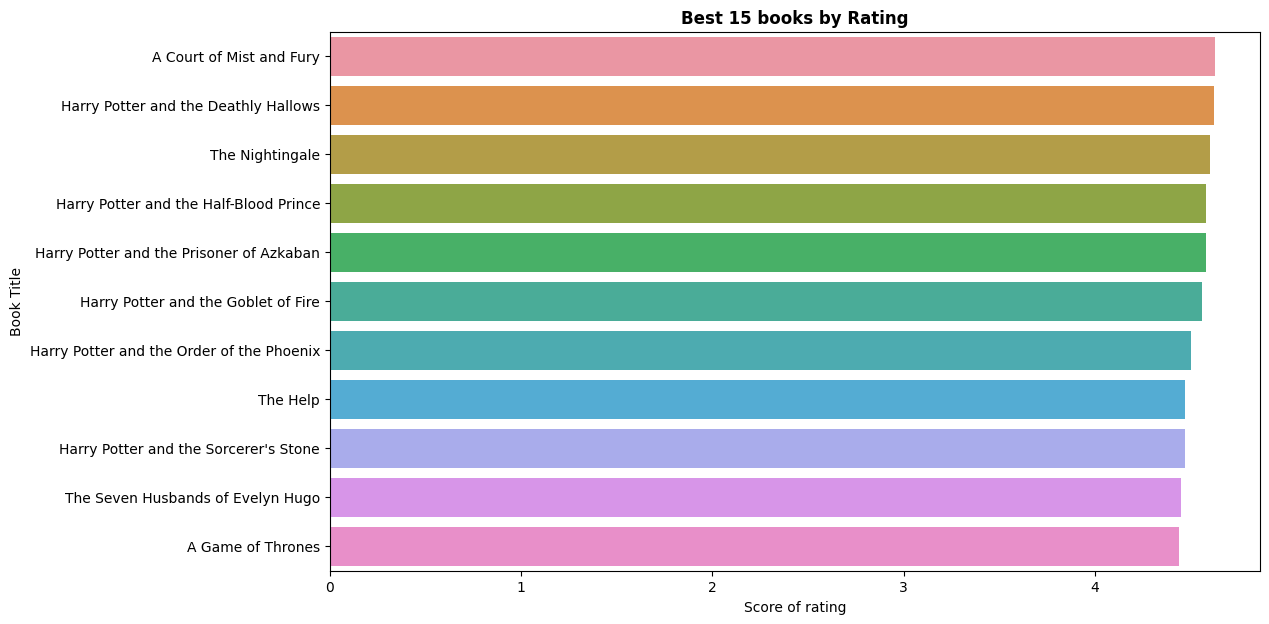

In [19]:
plot_books_by(book_sorted_ratings, 'rating', 15)

MOST POPULAR BOOKS

In [20]:
book_sorted_ratings_count = df.sort_values('num_ratings', ascending=False)
book_sorted_ratings_count[important_cols].head(15)

,title,author,rating,num_ratings,genres
114,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,9208051,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
98,The Hunger Games,Suzanne Collins,4.33,7898283,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas..."
813,Twilight,Stephenie Meyer,3.64,6121452,"['Fantasy', 'Young Adult', 'Romance', 'Fiction..."
1056,To Kill a Mockingbird,Harper Lee,4.27,5651663,"['Classics', 'Fiction', 'Historical Fiction', ..."
894,To Kill a Mockingbird,Harper Lee,4.27,5651617,"['Classics', 'Fiction', 'Historical Fiction', ..."
854,The Great Gatsby,F. Scott Fitzgerald,3.93,4801741,"['Classics', 'Fiction', 'School', 'Historical ..."
807,The Fault in Our Stars,John Green,4.15,4725830,"['Young Adult', 'Romance', 'Fiction', 'Contemp..."
2489,1984,George Orwell,4.19,4163051,"['Classics', 'Fiction', 'Science Fiction', 'Dy..."
660,1984,George Orwell,4.19,4161994,"['Classics', 'Fiction', 'Science Fiction', 'Dy..."
808,Pride and Prejudice,Jane Austen,4.28,3911165,"['Classics', 'Fiction', 'Romance', 'Historical..."


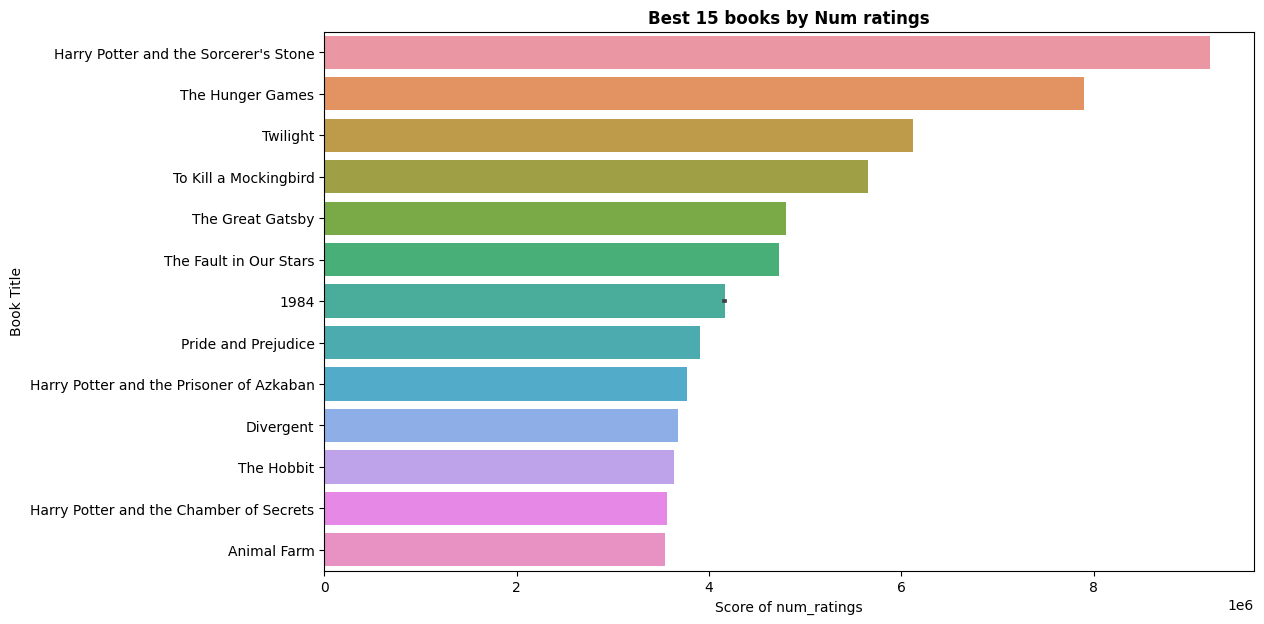

In [21]:
plot_books_by(book_sorted_ratings_count, 'num_ratings', 15)

Coming up with new features with feature-engineering (Combining rating and num_ratings to create a new scorer)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
cols = ['num_ratings','rating']
scaler = MinMaxScaler()
df_normalized = df[important_cols].copy()
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

In [24]:
df_normalized.head()

,title,author,rating,num_ratings,genres
0,The Kite Runner,Khaled Hosseini,0.866,0.318785,"['Fiction', 'Historical Fiction', 'Classics', ..."
1,Memoirs of a Geisha,Arthur Golden,0.828,0.208789,"['Fiction', 'Historical Fiction', 'Romance', '..."
2,A Thousand Splendid Suns,Khaled Hosseini,0.884,0.153915,"['Fiction', 'Historical Fiction', 'Contemporar..."
3,The Book Thief,Markus Zusak,0.878,0.254710,"['Historical Fiction', 'Fiction', 'Young Adult..."
4,Life of Pi,Yann Martel,0.786,0.167747,"['Fiction', 'Fantasy', 'Classics', 'Adventure'..."


Creating another column which combines rating and num_rating

In [73]:
df['book_score'] = 0.5 * df_normalized['num_ratings'] + 0.5 * df_normalized['rating']

In [27]:
df_normalized_sorted_score = df_normalized.sort_values('book_score', ascending=False)
df_normalized_sorted_score.head()

,title,author,rating,num_ratings,genres,book_score
114,Harry Potter and the Sorcerer's Stone,J.K. Rowling,0.894,1.000000,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",0.947000
98,The Hunger Games,Suzanne Collins,0.866,0.857758,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",0.861879
1056,To Kill a Mockingbird,Harper Lee,0.854,0.613774,"['Classics', 'Fiction', 'Historical Fiction', ...",0.733887
894,To Kill a Mockingbird,Harper Lee,0.854,0.613769,"['Classics', 'Fiction', 'Historical Fiction', ...",0.733885
813,Twilight,Stephenie Meyer,0.728,0.664793,"['Fantasy', 'Young Adult', 'Romance', 'Fiction...",0.696397


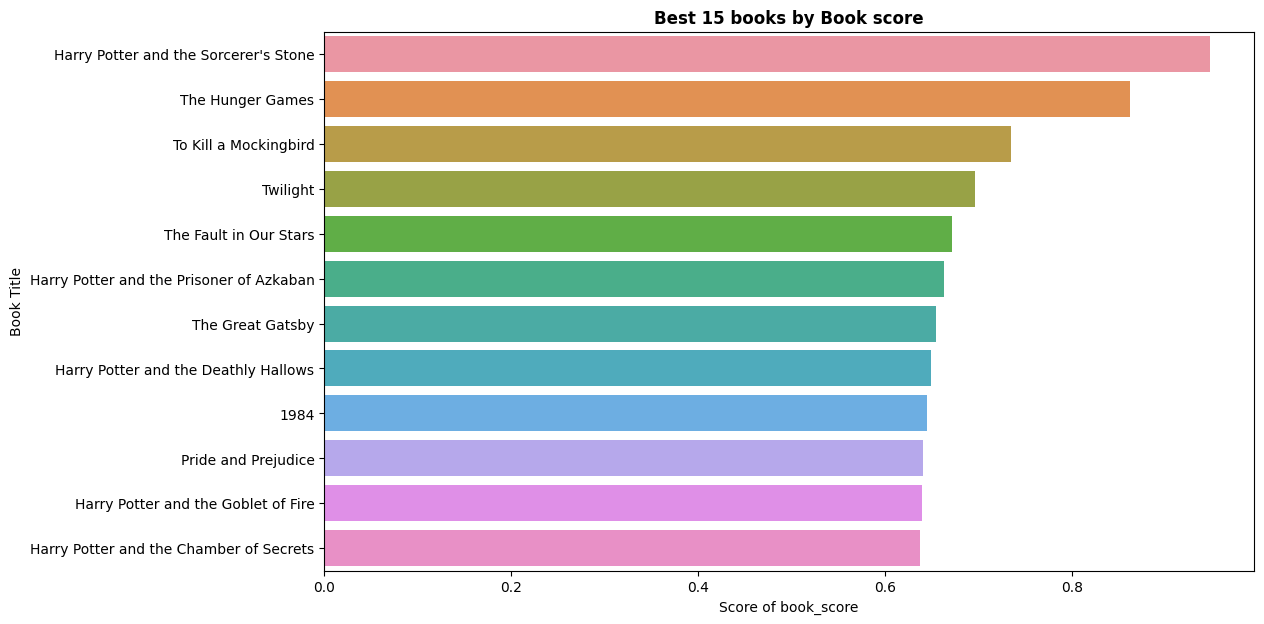

In [28]:
plot_books_by(df_normalized_sorted_score, 'book_score', 15)

As we can see, Harry Potter Books appear multiple times

Lets take a look at the authors

In [29]:
df.author.value_counts()

author
Ruby Dixon                       35
Agatha Christie                  22
Rick Riordan                     19
Michael Connelly                 19
Stephen King                     18
                                 ..
Renée Ahdieh                      1
Simon Winchester                  1
Mary Robinette Kowal              1
Winston Groom                     1
Olugbemisola Rhuday-Perkovich     1
Name: count, Length: 3512, dtype: int64

In [37]:
author_count = df.author.value_counts()

In [38]:


def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)



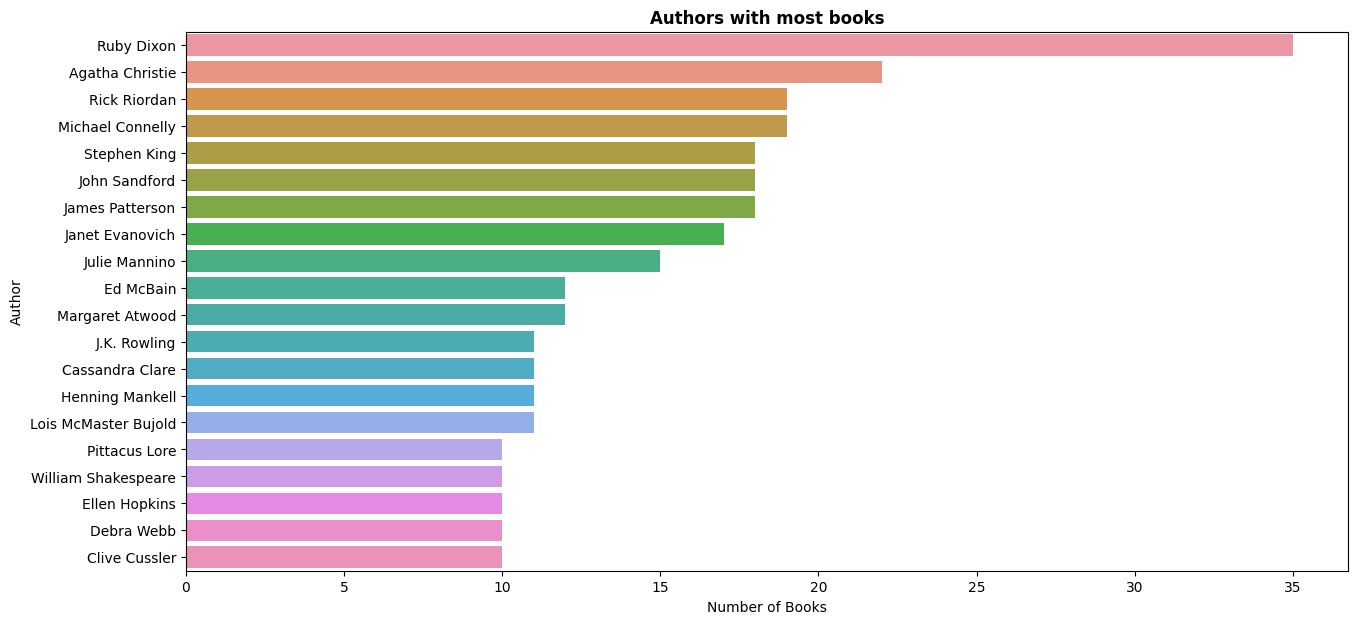

In [39]:
plot_authors_by(author_count, 'Authors with most books', 'Number of Books', 20)

We should rank authors based on their number of books and total rating count since an author with few books and few 5 star ratings will not be the same as an author with an average rating of 4.5 ~

In [42]:
def min_books(df, n):
    more_than_n = df['author'].value_counts().values >= n
    return df['author'].isin(df['author'].value_counts()[more_than_n == True].index)

In [47]:
def min_ratings_count(df, n):
    return df.num_ratings >= n

In [48]:
min_books(df, 5).head()

0    False
1    False
2    False
3    False
4    False
Name: author, dtype: bool

In [49]:
min_ratings_count(df, 10000).head()

0    True
1    True
2    True
3    True
4    True
Name: num_ratings, dtype: bool

In [51]:
df['author'].value_counts().describe()

count    3512.000000
mean        1.419989
std         1.453300
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        35.000000
Name: count, dtype: float64

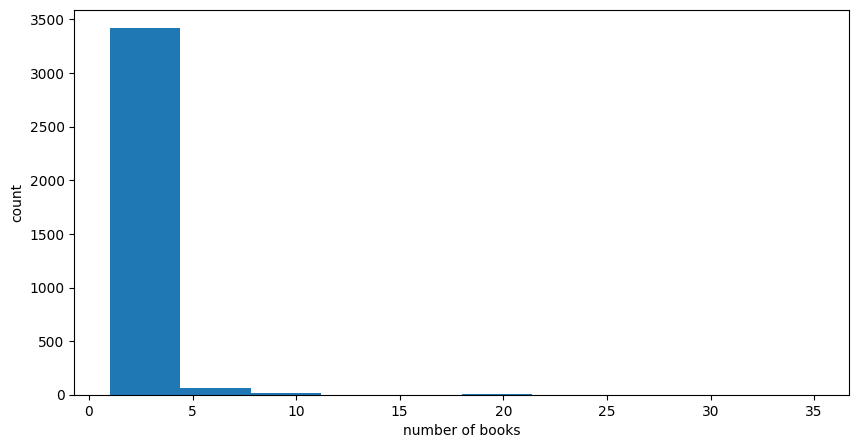

In [52]:
plt.figure(figsize=(10,5))
plt.hist(df.author.value_counts().values);
plt.xlabel('number of books');
plt.ylabel('count');

In [53]:
df['num_ratings'].describe()

count    4.987000e+03
mean     1.061345e+05
std      4.185656e+05
min      0.000000e+00
25%      2.370000e+02
50%      3.515000e+03
75%      3.576100e+04
max      9.208051e+06
Name: num_ratings, dtype: float64

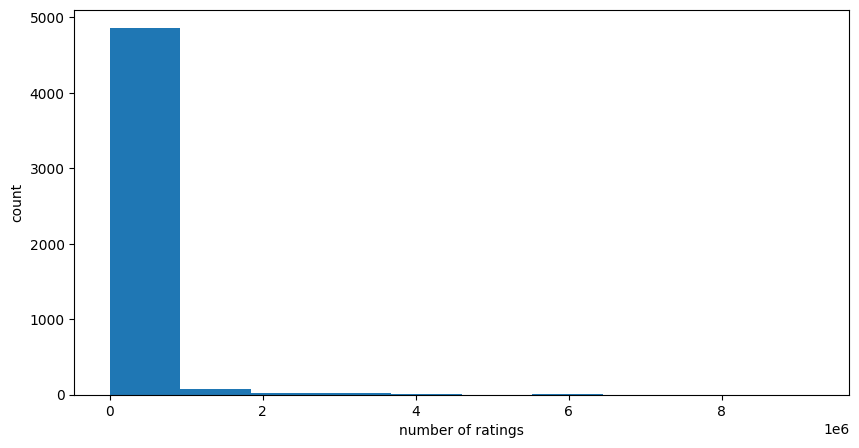

In [54]:
plt.figure(figsize=(10,5))
plt.hist(df['num_ratings']);
plt.xlabel('number of ratings');
plt.ylabel('count');

We are now going to define our successful author: Lets say 100k ratings and at least 10 books

In [77]:
s_author_books = min_books(df, 5)
s_author_ratings = min_ratings_count(df, 50000)

In [78]:


best_rating_authors = df[s_author_books & s_author_ratings].groupby('author')['rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)



author
J.K. Rowling            4.579091
J.R.R. Tolkien          4.493333
Brandon Sanderson       4.402857
George R.R. Martin      4.385000
Laura Ingalls Wilder    4.350000
Diana Gabaldon          4.320000
Cassandra Clare         4.312727
Rick Riordan            4.311111
Ken Follett             4.298000
Richelle Mead           4.271429
L.M. Montgomery         4.260000
Robert Jordan           4.258571
Ellen Hopkins           4.252000
Dr. Seuss               4.236000
Suzanne Collins         4.206000
Name: rating, dtype: float64

Lets see how many 'successful' authors there are in our dataset:

In [80]:
print('Sucsessful Authors are {} of {} authors'.format(len(best_rating_authors),len(df.author.unique())))

Sucsessful Authors are 57 of 3512 authors


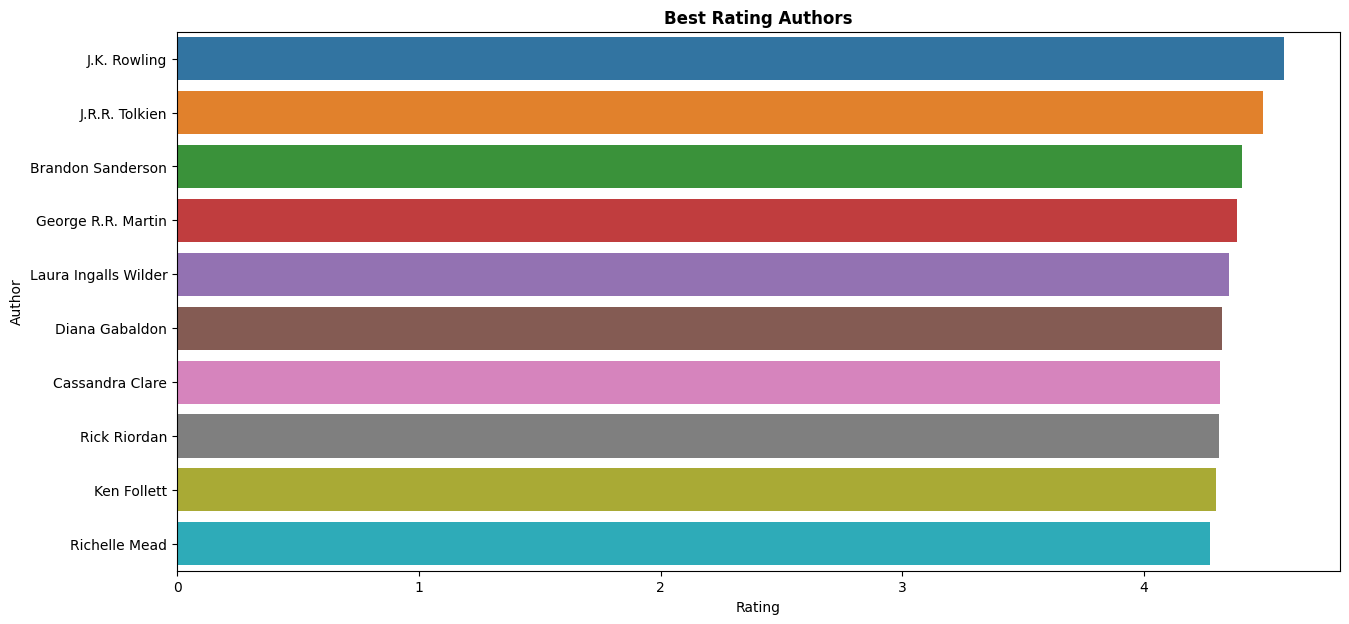

In [81]:
plot_authors_by(best_rating_authors, 'Best Rating Authors', 'Rating', 10)

Now lets see the authors with the most ratings:

In [82]:
most_ratings_authors = df.groupby('author')['num_ratings'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

author
J.K. Rowling           36324600
George Orwell          15469823
Suzanne Collins        14581071
Rick Riordan           12790614
Stephenie Meyer        12178814
Harper Lee             11303280
J.R.R. Tolkien         10614196
Dan Brown               7680224
George R.R. Martin      7629206
Cassandra Clare         7169203
Stephen King            6743547
John Green              6585372
William Shakespeare     6260218
Veronica Roth           6124465
Jane Austen             5035206
Name: num_ratings, dtype: int64

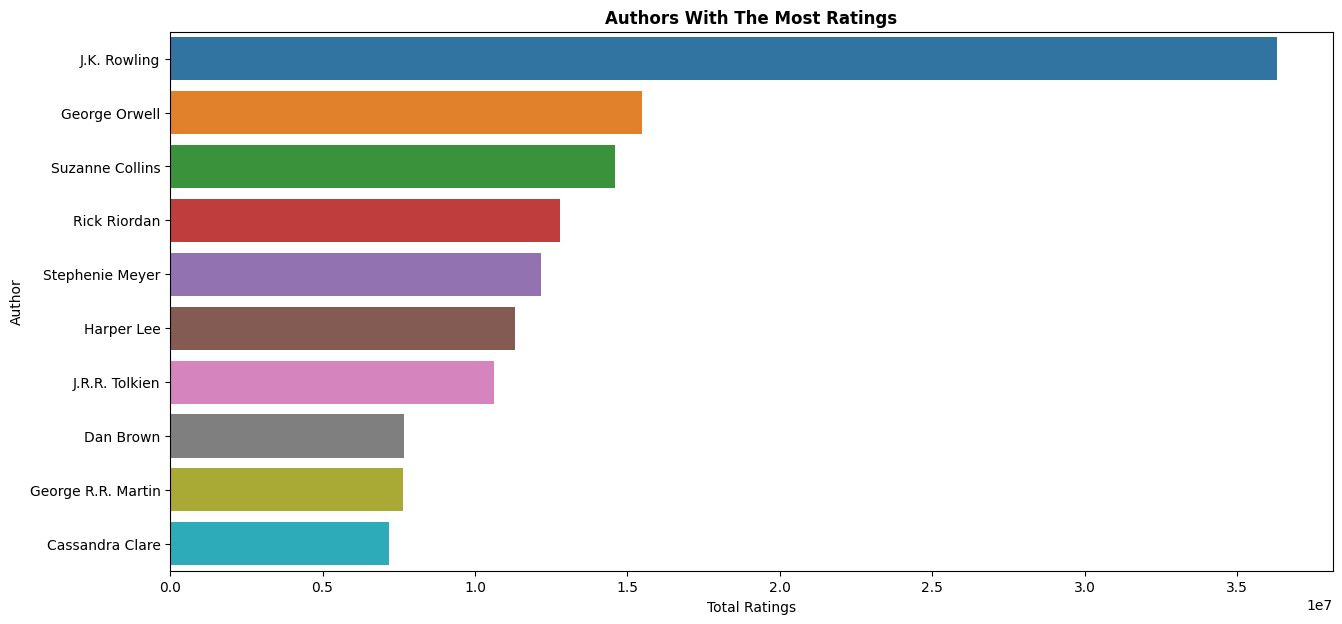

In [83]:
plot_authors_by(most_ratings_authors, 'Authors With The Most Ratings', 'Total Ratings', 10)

The same way we did with the best books, we are going to use feature-engineering to create a new scorer for authors

In [84]:
best_rating_authors_normalized = pd.DataFrame(best_rating_authors.values, index=best_rating_authors.index, columns=['rating'])
best_rating_authors_normalized['rating'] = scaler.fit_transform(best_rating_authors_normalized)
best_rating_authors_normalized.head()

,rating
author,
J.K. Rowling,1.000000
J.R.R. Tolkien,0.902002
Brandon Sanderson,0.798611
George R.R. Martin,0.778205
Laura Ingalls Wilder,0.738209


In [85]:
authors_rating_score = df['author'].apply(lambda x: best_rating_authors_normalized.loc[x].rating if x in best_rating_authors_normalized.index else 0.0)
authors_rating_score.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: author, dtype: float64

In [86]:
most_ratings_authors_normalized = pd.DataFrame(most_ratings_authors.values, index=most_ratings_authors.index, columns=['rating'])
most_ratings_authors_normalized['rating'] = scaler.fit_transform(most_ratings_authors_normalized)
most_ratings_authors_normalized.head()

,rating
author,
J.K. Rowling,1.000000
George Orwell,0.425877
Suzanne Collins,0.401410
Rick Riordan,0.352120
Stephenie Meyer,0.335277


In [87]:
authors_ratings_count_score = df['author'].apply(lambda x: most_ratings_authors_normalized.loc[x].rating)
authors_ratings_count_score.head()

0    0.129493
1    0.105863
2    0.129493
3    0.068814
4    0.042523
Name: author, dtype: float64

In [88]:
df['author_score'] = 0.5 * authors_rating_score + 0.5 * authors_ratings_count_score
df['author_score'].head()

0    0.064747
1    0.052931
2    0.064747
3    0.034407
4    0.021261
Name: author_score, dtype: float64

In [89]:
best_authors = df.groupby('author')['author_score'].mean().sort_values(ascending=False)
best_authors.head(15)

author
J.K. Rowling            1.000000
J.R.R. Tolkien          0.597103
Rick Riordan            0.522945
George R.R. Martin      0.494117
Suzanne Collins         0.487533
Cassandra Clare         0.446490
George Orwell           0.431202
Brandon Sanderson       0.429457
Diana Gabaldon          0.391989
Laura Ingalls Wilder    0.371772
Ken Follett             0.362422
Richelle Mead           0.354513
Robert Jordan           0.340970
L.M. Montgomery         0.336164
Dr. Seuss               0.329504
Name: author_score, dtype: float64

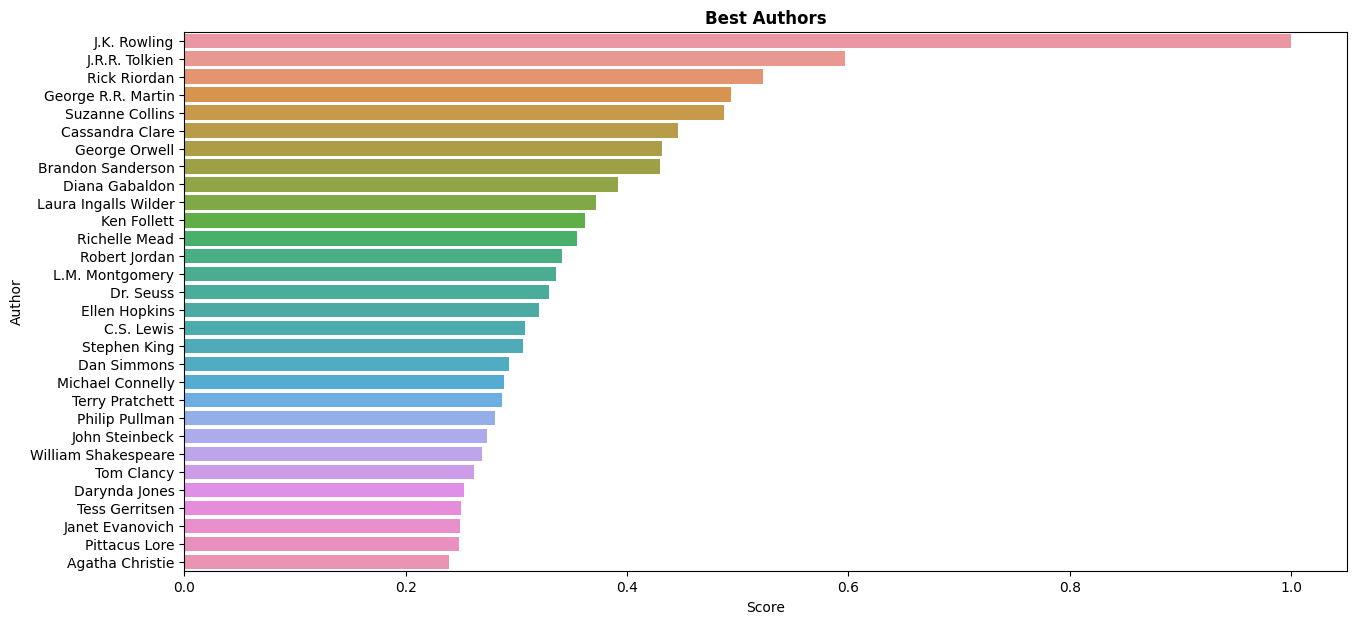

In [90]:
plot_authors_by(best_authors, 'Best Authors', 'Score', 30)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 5039
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          4987 non-null   object 
 1   title            4987 non-null   object 
 2   author           4987 non-null   object 
 3   price            4987 non-null   float64
 4   genres           4987 non-null   object 
 5   series           4987 non-null   int64  
 6   publisher        4987 non-null   object 
 7   year_published   4987 non-null   object 
 8   current_readers  4987 non-null   float64
 9   wanted_to_read   4987 non-null   float64
 10  num_reviews      4987 non-null   object 
 11  num_ratings      4987 non-null   int64  
 12  rating           4987 non-null   float64
 13  awards           4987 non-null   object 
 14  primary_lists    4987 non-null   object 
 15  author_score     4987 non-null   float64
 16  book_score       4987 non-null   float64
dtypes: float64(6), int6

In [92]:
df.head()

,book_id,title,author,price,genres,series,publisher,year_published,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists,author_score,book_score
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,8.717848,"['Fiction', 'Historical Fiction', 'Classics', ...",0,Riverhead Books,2004-05-01,42900.0,1000000.0,"90,234",2935385,4.33,['Borders Original Voices Award for Fiction (2...,['Books That Everyone Should Read At Least Onc...,0.064747,0.592392
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.990000,"['Fiction', 'Historical Fiction', 'Romance', '...",0,Vintage Books USA,2005-11-22,12300.0,793000.0,"34,102",1922540,4.14,[],"['Best Books Ever', 'Best Historical Fiction',...",0.052931,0.518395
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.990000,"['Fiction', 'Historical Fiction', 'Contemporar...",0,Riverhead Books,2007-06-01,32700.0,760000.0,"69,431",1417260,4.42,['British Book Award for Best Read of the Year...,"['Best Books Ever', 'Books That Everyone Shoul...",0.064747,0.518958
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.990000,"['Historical Fiction', 'Fiction', 'Young Adult...",0,Alfred A. Knopf,2006-03-14,86000.0,2000000.0,"134,883",2345385,4.39,['National Jewish Book Award for Children’s an...,"['Best Books Ever', 'Books That Everyone Shoul...",0.034407,0.566355
4,4214.Life_of_Pi,Life of Pi,Yann Martel,8.717848,"['Fiction', 'Fantasy', 'Classics', 'Adventure'...",0,Seal Books,2006-08-29,24900.0,726000.0,"51,257",1544622,3.93,"['Booker Prize (2002)', 'Bollinger Everyman Wo...","['Best Books Ever', 'Books That Everyone Shoul...",0.021261,0.476873
